In [1]:
!pip install tensorflow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
import tensorflow.keras
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
import tensorflow as tf

print(tf.__version__)

2.8.2


In [5]:
import tensorflow as tf
import pandas as pd

In [6]:
dataset = pd.read_csv("/content/diabetes.csv",header=None) 

In [7]:
dataset

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
...,...,...,...,...,...,...,...,...,...
754,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000,1
755,-0.764706,0.226131,0.147541,-0.454545,0.000000,0.096870,-0.776260,-0.800000,1
756,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000,1
757,-0.882353,0.266332,-0.016393,0.000000,0.000000,-0.102832,-0.768574,-0.133333,0


In [8]:
# reanming the DataFrame columns
df = dataset.set_axis(['V', 'W', 'X', 'Y', 'Z','A','B','C','D'], axis=1, inplace=False);




Pre processing 

In [9]:
# displaying the DataFrame
print(df)

            V         W         X         Y         Z         A         B  \
0   -0.294118  0.487437  0.180328 -0.292929  0.000000  0.001490 -0.531170   
1   -0.882353 -0.145729  0.081967 -0.414141  0.000000 -0.207153 -0.766866   
2   -0.058824  0.839196  0.049180  0.000000  0.000000 -0.305514 -0.492741   
3   -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4    0.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   
..        ...       ...       ...       ...       ...       ...       ...   
754  0.176471  0.015075  0.245902 -0.030303 -0.574468 -0.019374 -0.920581   
755 -0.764706  0.226131  0.147541 -0.454545  0.000000  0.096870 -0.776260   
756 -0.411765  0.216080  0.180328 -0.535354 -0.735225 -0.219076 -0.857387   
757 -0.882353  0.266332 -0.016393  0.000000  0.000000 -0.102832 -0.768574   
758 -0.882353 -0.065327  0.147541 -0.373737  0.000000 -0.093890 -0.797609   

            C  D  
0   -0.033333  0  
1   -0.666667  1  
2   -0.633333  0  

In [10]:
df.dtypes

V    float64
W    float64
X    float64
Y    float64
Z    float64
A    float64
B    float64
C    float64
D      int64
dtype: object

In [11]:
df.isna().sum()

V    0
W    0
X    0
Y    0
Z    0
A    0
B    0
C    0
D    0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.shape

(759, 9)

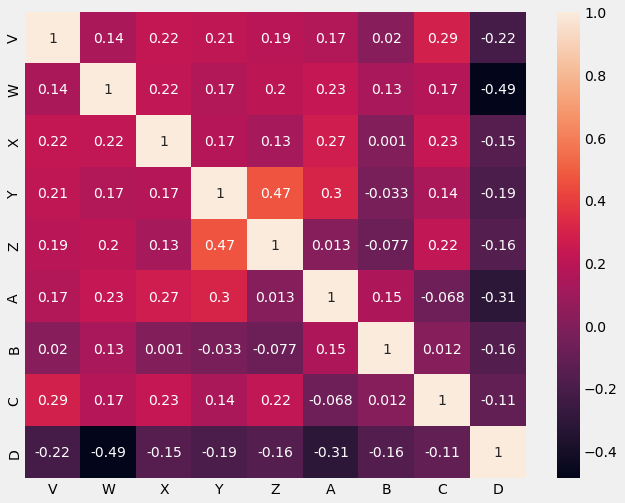

In [14]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(df.corr(), annot=True, ax=ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f255043d8d0>,
      dtype=object)

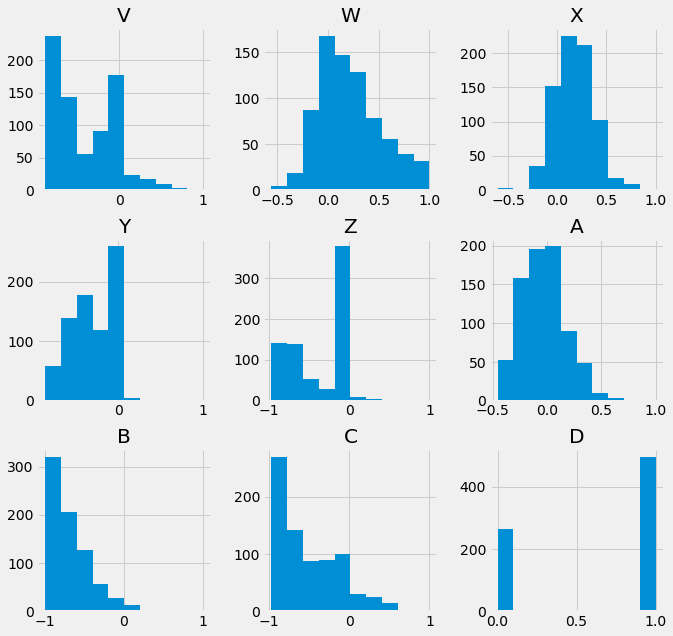

In [15]:
df.hist(figsize=(10, 10))

In [16]:
df.describe()

,V,W,X,Y,Z,A,B,C,D
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,-0.407657,0.218563,0.176505,-0.289735,-0.323534,-0.032245,-0.663253,-0.516162,0.653491
std,0.386260,0.306419,0.201287,0.258480,0.375544,0.205376,0.283056,0.400794,0.476171
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.178837,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.747225,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.531597,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Preparation of the data
# Split the data into a training set, dev set and test set.
# Normalize the data.

from sklearn.preprocessing import Normalizer


X = df.drop('D', axis =1).values
y = df.D.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


nl = Normalizer()
nl.fit(X_train)
X_train = nl.transform(X_train)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)
X_dev = nl.transform(X_dev)
X_test = nl.transform(X_test)



In [18]:
# Neural Network arhitecture
# 3 hidden layers
# Output layer - sigmoid activation.\\

from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model

def nn():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(128, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(128, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(128, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [19]:
model = nn()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 8)]               0         
                                                                 
 FC1 (Dense)                 (None, 128)               1152      
                                                                 
 BC1 (BatchNormalization)    (None, 128)               512       
                                                                 
 Activation1 (Activation)    (None, 128)               0         
                                                                 
 Dropout1 (Dropout)          (None, 128)               0         
                                                                 
 FC2 (Dense)                 (None, 128)               16512     
                                                                 
 BC2 (BatchNormalization)    (None, 128)               512   

In [20]:
#The parameters used in my model, there is a total of 35,073 trainable parameters

In [21]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD

model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.001), metrics=['accuracy'])

In [22]:
#callbacks
early_stopping = EarlyStopping(patience=20, min_delta=0.0001)

In [23]:
h = model.fit(x=X_train, y=y_train, epochs=500, batch_size =20 , validation_data=(X_dev, y_dev), callbacks=[early_stopping], verbose=1)
h

Epoch 1/500
27/27 [==============================] - 2s 15ms/step - loss: 0.9438 - accuracy: 0.4991 - val_loss: 0.6808 - val_accuracy: 0.7105
Epoch 2/500
27/27 [==============================] - 0s 6ms/step - loss: 0.8892 - accuracy: 0.5254 - val_loss: 0.6411 - val_accuracy: 0.7193
Epoch 3/500
27/27 [==============================] - 0s 5ms/step - loss: 0.8239 - accuracy: 0.5631 - val_loss: 0.6099 - val_accuracy: 0.7193
Epoch 4/500
27/27 [==============================] - 0s 5ms/step - loss: 0.8225 - accuracy: 0.5800 - val_loss: 0.5942 - val_accuracy: 0.7193
Epoch 5/500
27/27 [==============================] - 0s 4ms/step - loss: 0.7916 - accuracy: 0.5669 - val_loss: 0.5858 - val_accuracy: 0.7193
Epoch 6/500
27/27 [==============================] - 0s 5ms/step - loss: 0.7397 - accuracy: 0.6139 - val_loss: 0.5808 - val_accuracy: 0.7193
Epoch 7/500
27/27 [==============================] - 0s 5ms/step - loss: 0.7432 - accuracy: 0.6158 - val_loss: 0.5773 - val_accuracy: 0.7193
Epoch 8/500


In [24]:
# Metrics

a = [X_train, X_dev, X_test]
b = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(a, b)):
    y_pred = model.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if i == 0:
        print('Training set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    elif i == 1:
        print('Dev set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    else:
        print('Test set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    


Training set:
	Accuracy:0.768
	Classification Report
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       190
           1       0.82      0.82      0.82       341

    accuracy                           0.77       531
   macro avg       0.75      0.75      0.75       531
weighted avg       0.77      0.77      0.77       531

Dev set:
	Accuracy:0.746
	Classification Report
              precision    recall  f1-score   support

           0       0.54      0.62      0.58        32
           1       0.84      0.79      0.82        82

    accuracy                           0.75       114
   macro avg       0.69      0.71      0.70       114
weighted avg       0.76      0.75      0.75       114

Test set:
	Accuracy:0.763
	Classification Report
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        41
           1       0.83      0.79      0.81        73

    accuracy                    

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[29, 12],
       [15, 58]])

Text(18.82, 0.5, 'Predicted Values')

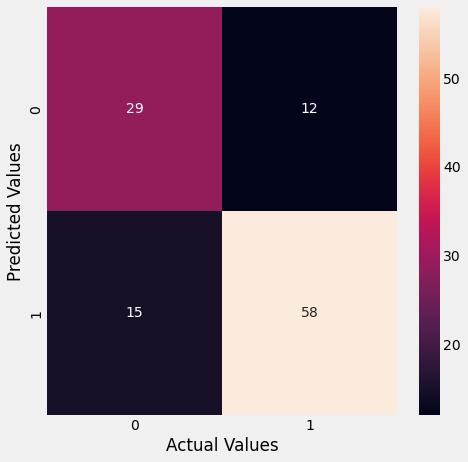

In [26]:
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [27]:
from keras.callbacks import History

history = History()

# check the keys of history object
print(history.history.keys())


dict_keys([])


In [28]:
h.history

{'loss': [0.9438068270683289,
  0.8891976475715637,
  0.8238722681999207,
  0.8225188255310059,
  0.7916378974914551,
  0.7397000789642334,
  0.7431953549385071,
  0.7637677192687988,
  0.7693057656288147,
  0.7273122668266296,
  0.701509952545166,
  0.6953634023666382,
  0.6742156147956848,
  0.6590307354927063,
  0.7101758122444153,
  0.6987786889076233,
  0.6848090887069702,
  0.666079580783844,
  0.6548120975494385,
  0.659868597984314,
  0.667617678642273,
  0.6249693036079407,
  0.6558536291122437,
  0.6461523771286011,
  0.6725890040397644,
  0.6526415944099426,
  0.6706575751304626,
  0.6744812726974487,
  0.6517236232757568,
  0.6531542539596558,
  0.6748936176300049,
  0.6351456046104431,
  0.6147182583808899,
  0.6414283514022827],
 'accuracy': [0.4990583658218384,
  0.5254237055778503,
  0.5630885362625122,
  0.5800376534461975,
  0.5668550133705139,
  0.6139359474182129,
  0.6158192157745361,
  0.6177024245262146,
  0.5969868302345276,
  0.630885124206543,
  0.653483986854

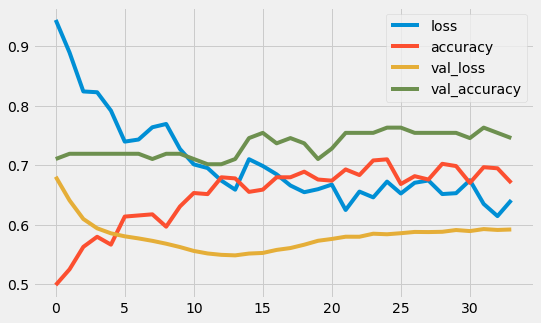

In [29]:
pd.DataFrame(h.history).plot(figsize=(8,5))
plt.show()

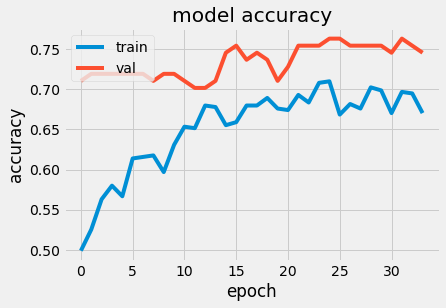

In [30]:


plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

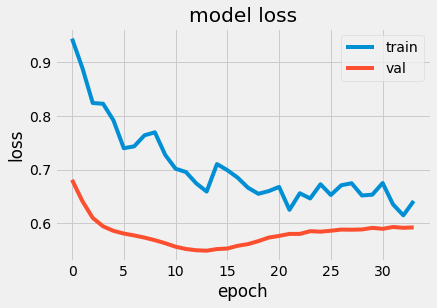

In [31]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

**#Hypothesis**

> We can change the epochs, batch size , number of hidden layers, optimizer to make changes to the accuarcy of the model.Further we can also change the activation funcations to softmax, reLU, leakyLU etc for experimentation. We can change into two different ways to implement categorical cross entropy
.We can also chnage the number of dense layers.



 


**#Observation**


> 
1.   Epochs = 200;batch_size = 20; optimizer= Adam ; accuarcy(Tets set) = 80
2.   Epochs = 500 ;batch_size = 20; optimizer= Adam ; ccuarcy(Tets set) = 83
3.   Epochs = 500;batch_size = 25; optimizer= Adam ; accuarcy(Tets set) = 83.33
4.   Epochs = 500;batch_size = 32; optimizer= Adam ; accuarcy(Tets set) = 83.33


1. Epochs = 500;batch_size = 20; optimizer= SDG ; accuarcy(Tets set) = 83.3
2. Epochs = 600;batch_size = 32; optimizer= SDG ; accuarcy(Tets set) = 83.3
3. Epochs = 100;batch_size = 25; optimizer= SDG ; accuarcy(Tets set) = 82.5


**#Summary**


> With various trails I chose SDG over Adam ,SGD better generalizes than Adam as it has helped the model produce better accuarcy with changes in ephocs and batch size respectively. Gradient Descent is the most basic but most used optimization algorithm. It's used heavily in linear regression and classification algorithms. Adam is said to be best for multiclass classfication.



*Refereces*:

https://www.tensorflow.org/tutorials/load_data/csv https://betterprogramming.pub/
build-your-first-machine-learning-model-with-tensorflow-ffc2f7cbf4f2*